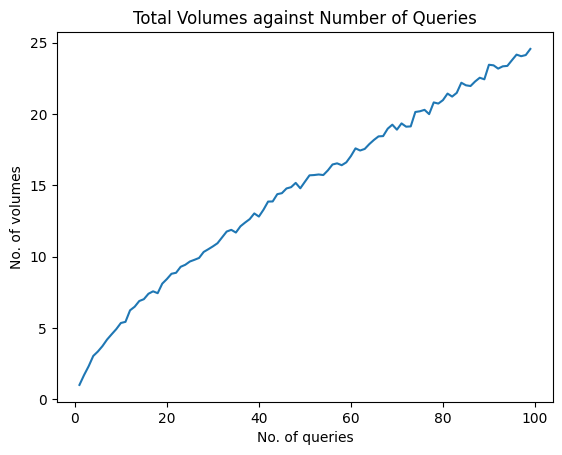

In [16]:

RSEmax = 16

EDS = []

def node(start, end):
    # Base case: when start == end, we return (start, start)
    if start == end:
        if (start, start) not in EDS:  
            EDS.append((start, start))
        return (start, start)
    
    # Recursive case: divide the problem in half
    mid = (start + end) // 2
    left_child = node(start, mid)
    right_child = node(mid + 1, end)
    
    # Add left and right children to EDS if not already present
    if left_child not in EDS:
        EDS.append(left_child)
    
    if right_child not in EDS:
        EDS.append(right_child)

    # Combine the left and right children
    combined = (left_child[0], right_child[1])
    if combined not in EDS:
        EDS.append(combined)
    
    return combined

node(1, RSEmax)

def over_cover(a, b):
  nodes_in_range = []
  min_node = []
  minimum_range = RSEmax
  for node in EDS:
    if node[0] <= a and node[1] >= b:
      nodes_in_range.append(node)
  for node in nodes_in_range:
    if node[1] - node[0] < minimum_range:
      minimum_range = node[1] - node[0]
      min_node.clear()
      min_node.append(node)
  return min_node[0]

import random
import matplotlib.pyplot as plt

def overcover_log_query(num_of_qry):
    all_combinations = {(start, end) for start in range(1, RSEmax + 1) for end in range(start, RSEmax + 1)}
    total_vols = 0

    for h in range(100):
        vol_tracker = set()  
        vol_sum = 0
        parent = all_combinations.copy()

        for v in range(num_of_qry):
            if not parent: #if parent is not empty, False, wont break
                break
            
            (start_int, end_int) = random.choice(list(parent))
            parent.remove((start_int, end_int))

            if over_cover(start_int, end_int) not in vol_tracker:
                vol_tracker.add(over_cover(start_int, end_int))
                vol_sum += 1

        total_vols += vol_sum
    
    return total_vols / 100  

x_axis = []
y_axis = []
for v in range(1, 100):
    x_axis.append(v)
    y_axis.append(overcover_log_query(v))

plt.plot(x_axis, y_axis)
plt.xlabel("No. of queries")  
plt.ylabel("No. of volumes")  
plt.title("Total Volumes against Number of Queries")  
plt.show()
    

In [15]:
EDS = []

def node(start, end):
    # Base case: when start == end, we return (start, start)
    if start == end:
        if (start, start) not in EDS:  
            EDS.append((start, start))
        return (start, start)
    
    # Recursive case: divide the problem in half
    mid = (start + end) // 2
    left_child = node(start, mid)
    right_child = node(mid + 1, end)
    
    # Add left and right children to EDS if not already present
    if left_child not in EDS:
        EDS.append(left_child)
    
    if right_child not in EDS:
        EDS.append(right_child)

    # Combine the left and right children
    combined = (left_child[0], right_child[1])
    if combined not in EDS:
        EDS.append(combined)
    
    return combined

# Starting the recursion
node(1, 16)
print(EDS)


[(1, 1), (2, 2), (1, 2), (3, 3), (4, 4), (3, 4), (1, 4), (5, 5), (6, 6), (5, 6), (7, 7), (8, 8), (7, 8), (5, 8), (1, 8), (9, 9), (10, 10), (9, 10), (11, 11), (12, 12), (11, 12), (9, 12), (13, 13), (14, 14), (13, 14), (15, 15), (16, 16), (15, 16), (13, 16), (9, 16), (1, 16)]
